In [1]:
import sys

# Replace this with the path to the repository
sys.path.append("/home/zhenhao/ETFMH/")


In [2]:
from db_sketching.kmer_selection import KMerImportanceLearning
from db_sketching.kmer_set import KMerSet, FracMinHash


def cond(kmer_hash):
    hash = (976369 * kmer_hash + 1982627) % 10000
    if hash < 100:
        return True
    else:
        return False

kmer_set = FracMinHash(cond, 12)
learner = KMerImportanceLearning(kmer_set)

In [3]:
import glob
from pathlib import Path

categories = glob.glob("../data_temp/*")

for category in categories:
    name = Path(category).stem
    for file in glob.glob(category + "/*.fna"):
        learner.insert_reference(file, name)
        print(file)

../data_temp/Anaerovoracaceae/GCA_017523605.1.fna
../data_temp/Anaerovoracaceae/GCA_944386615.1.fna
../data_temp/Anaerovoracaceae/GCA_012511395.1.fna
../data_temp/Anaerovoracaceae/GCA_017505405.1.fna
../data_temp/Anaerovoracaceae/GCA_934281585.1.fna
../data_temp/Anaerovoracaceae/GCA_000488855.1.fna
../data_temp/Anaerovoracaceae/GCA_943192965.1.fna
../data_temp/Anaerovoracaceae/GCA_017511535.1.fna
../data_temp/Anaerovoracaceae/GCA_905206455.1.fna
../data_temp/Anaerovoracaceae/GCA_015058145.1.fna
../data_temp/Bacteroidaceae/GCA_022740765.1.fna
../data_temp/Bacteroidaceae/GCA_015549665.1.fna
../data_temp/Bacteroidaceae/GCA_022721415.1.fna
../data_temp/Bacteroidaceae/GCA_000598945.1.fna
../data_temp/Bacteroidaceae/GCA_007896595.1.fna
../data_temp/Bacteroidaceae/GCA_014871205.1.fna
../data_temp/Bacteroidaceae/GCA_934196725.1.fna
../data_temp/Bacteroidaceae/GCA_021410705.1.fna
../data_temp/Bacteroidaceae/GCA_902755065.1.fna
../data_temp/Bacteroidaceae/GCA_902791395.1.fna
../data_temp/Enterob

In [9]:
res = learner.extract_informative_kmers(information_gain_threshold=-20)

In [50]:
res

{2097153: -0.21870790250870442,
 3670020: -0.501510569080704,
 14155787: -0.1976651817321593,
 8912909: -0.18878075960798846,
 3670031: -0.5608660443697966,
 20: -0.22525129735870486,
 14155798: -0.20182758006142354,
 15728665: -0.33127563171814867,
 10485787: -0.1632776658784545,
 5242909: -0.3650570573543681,
 31: -0.27299280860288544,
 15728676: -0.3870984333162255,
 10485798: -0.21493633268719226,
 12058665: -0.34335689721053164,
 6815787: -0.2581110712469412,
 1572909: -0.1313371984158982,
 12058676: -0.33883585831278973,
 6815798: -0.39517229552563915,
 8388665: -0.23720518040855065,
 3145787: -0.43582617570463755,
 13631554: -0.16357919822293532,
 8388676: -0.28680129768657414,
 3145798: -0.12838728709765812,
 4718665: -0.30963316255401185,
 15204432: -0.27307207836951486,
 9961554: -0.308915089872845,
 4718676: -0.18724348957169656,
 1048665: -0.36835403279338186,
 15204443: -0.22198640365765154,
 11534432: -0.22445800394791204,
 6291554: -0.23724175693883165,
 1048676: -0.2914

<Axes: ylabel='Count'>

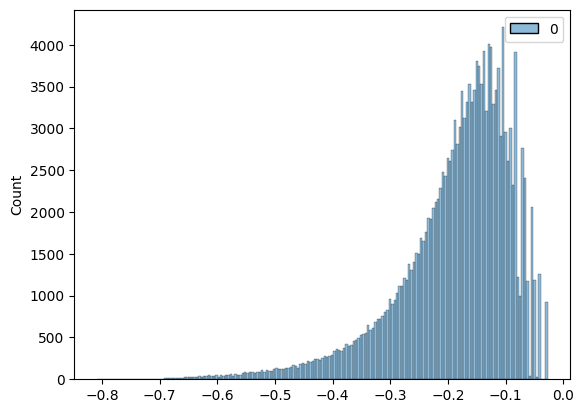

In [14]:
import seaborn

seaborn.histplot(res.values())

In [16]:
# Test if the informative k-mers give better classification results.

10

In [45]:
informative_kmers = set([kmer for kmer in res if res[kmer] > - 0.2])

In [46]:
def is_informative(kmer_hash):
    return kmer_hash in informative_kmers

In [49]:
len(informative_kmers)

108379

In [21]:
len(res)

167366

In [48]:
import orthoani
from Bio.SeqIO import read, parse

categories = glob.glob("../data_temp/*")

y = []
pred_FMH = []
pred_inf = []
pred_ANI = []

for i in categories:
    for j in categories:
        #if i == j:
            #continue
        # Compare two genomes in the classes
        for genomes_i in glob.glob(i + "/*.fna"):
            for genomes_j in glob.glob(j + "/*.fna"):
                print("Comparing", genomes_i, genomes_j)
                # FracMinHash
                f_i = FracMinHash(cond, 12)
                f_j = FracMinHash(cond, 12)
                f_i.insert_file(genomes_i)
                f_j.insert_file(genomes_j)
                pred_FMH.append(f_i.resemblence(f_j))
                print(pred_FMH[-1])

                # Informative k-mers
                f_i = FracMinHash(is_informative, 12)
                f_j = FracMinHash(is_informative, 12)
                f_i.insert_file(genomes_i)
                f_j.insert_file(genomes_j)
                pred_inf.append(f_i.resemblence(f_j))
                print(pred_inf[-1])
                
                # OrthoANI
                try:
                    genome_1_read = parse(genomes_i,"fasta")
                    genome_2_read = parse(genomes_j,"fasta")
                    ortho_ani_value = orthoani.orthoani(genome_1_read,genome_2_read)

                    pred_ANI.append(ortho_ani_value)
                except:
                    pred_ANI.append(0)
                print(pred_ANI[-1])
                # True label
                if i == j:
                    y.append(1)
                else:
                    y.append(0)
                
                print(y[-1], pred_FMH[-1], pred_inf[-1], pred_ANI[-1])
        
        print(i, j)
    




Comparing ../data_temp/Anaerovoracaceae/GCA_017523605.1.fna ../data_temp/Anaerovoracaceae/GCA_017523605.1.fna
1.0
1.0
0.9995340528634361
1 1.0 1.0 0.9995340528634361
Comparing ../data_temp/Anaerovoracaceae/GCA_017523605.1.fna ../data_temp/Anaerovoracaceae/GCA_944386615.1.fna
0.06481748665416245
0.05269118038902212
0.6429113366336634
1 0.06481748665416245 0.05269118038902212 0.6429113366336634
Comparing ../data_temp/Anaerovoracaceae/GCA_017523605.1.fna ../data_temp/Anaerovoracaceae/GCA_012511395.1.fna
0.05133406835722161
0.04395516413130504
0.6243216129032259
1 0.05133406835722161 0.04395516413130504 0.6243216129032259
Comparing ../data_temp/Anaerovoracaceae/GCA_017523605.1.fna ../data_temp/Anaerovoracaceae/GCA_017505405.1.fna
0.0909903053965523
0.0747239976757699
0.6540957299270073
1 0.0909903053965523 0.0747239976757699 0.6540957299270073
Comparing ../data_temp/Anaerovoracaceae/GCA_017523605.1.fna ../data_temp/Anaerovoracaceae/GCA_934281585.1.fna
0.07016488145384522
0.0529526965953600

KeyboardInterrupt: 